ENHANCED CNNBCN WITH PROXIMITY-BASED INTER-MODULE CONNECTIONS

PROXIMITY-BASED HIERARCHICAL CONNECTION STRUCTURE

HUB TO HUB:
--------------------------------------------------
  Module 0, Node  1 -> Module 1, Node  6
  Module 1, Node  6 -> Module 2, Node  0
  Module 2, Node  0 -> Module 3, Node  4
  Module 0, Node  3 -> Module 1, Node  7
  Module 1, Node  7 -> Module 2, Node  2
  Module 2, Node  2 -> Module 3, Node  5
  Module 0, Node  1 -> Module 3, Node  4
  Module 1, Node  6 -> Module 3, Node  4

SKIP CONNECTIONS:
--------------------------------------------------
  Module 0, Node  0 -> Module 1, Node  2
  Module 0, Node  7 -> Module 1, Node  7
  Module 0, Node  4 -> Module 1, Node  4
  Module 0, Node  5 -> Module 1, Node  7
  Module 1, Node  0 -> Module 2, Node  0
  Module 1, Node  7 -> Module 2, Node  7
  Module 1, Node  1 -> Module 2, Node  3
  Module 1, Node  3 -> Module 2, Node  3
  Module 2, Node  6 -> Module 3, Node  6
  Module 2, Node  3 -> Module 3, Node  1
  Module 2, Nod

100%|██████████| 170M/170M [00:13<00:00, 12.9MB/s]



Starting training with proximity-based connections...
Training Enhanced CNNBCN with Proximity-Based Connections
Device: cuda
Parameters: 7,072,330
Epoch: 1/15, Batch: 0, Loss: 2.3927
Epoch: 1/15, Batch: 100, Loss: 2.3443
Epoch: 1/15, Batch: 200, Loss: 2.1375
Epoch: 1/15, Batch: 300, Loss: 2.1532
Epoch: 1/15, Batch: 400, Loss: 2.2085
Epoch: 1/15, Batch: 500, Loss: 2.0473
Epoch: 1/15, Batch: 600, Loss: 2.2188
Epoch: 1/15, Batch: 700, Loss: 2.1368
Epoch 1/15:
  Train Loss: 2.1764, Train Acc: 19.07%
  Test Acc: 22.02%
--------------------------------------------------
Epoch: 2/15, Batch: 0, Loss: 2.0273
Epoch: 2/15, Batch: 100, Loss: 2.2070
Epoch: 2/15, Batch: 200, Loss: 2.0811
Epoch: 2/15, Batch: 300, Loss: 2.1137
Epoch: 2/15, Batch: 400, Loss: 2.0090
Epoch: 2/15, Batch: 500, Loss: 2.2439
Epoch: 2/15, Batch: 600, Loss: 2.1210
Epoch: 2/15, Batch: 700, Loss: 2.1085
Epoch 2/15:
  Train Loss: 2.0860, Train Acc: 22.17%
  Test Acc: 26.42%
--------------------------------------------------
Epoc

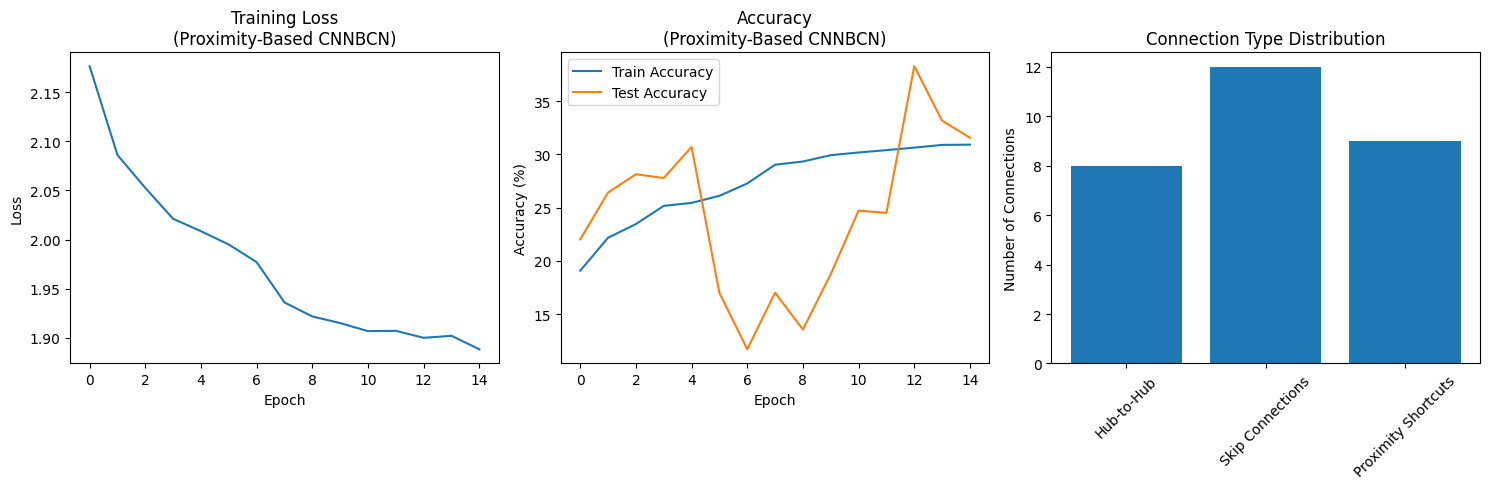


Training complete!
Final test accuracy: 31.57%


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple, Optional
import math
from collections import defaultdict

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

class DAGConverter:
    """Convert undirected graph to Directed Acyclic Graph"""

    def __init__(self):
        pass

    def convert_to_dag(self, graph: nx.Graph) -> nx.DiGraph:
        """
        Convert undirected graph to DAG by assigning indices and directing edges
        from smaller to larger index (as described in paper)
        """
        # Create directed graph
        dag = nx.DiGraph()

        # Add all nodes
        dag.add_nodes_from(graph.nodes())

        # Add directed edges from smaller to larger index
        for u, v in graph.edges():
            if u < v:
                dag.add_edge(u, v)
            else:
                dag.add_edge(v, u)

        return dag

class ProximityCalculator:
    """
    Advanced proximity calculator implementing three-dimensional node analysis:
    1. Information Bottleneck Analysis
    2. Positional Similarity Analysis
    3. Functional Similarity Analysis
    """

    def __init__(self, dags: List[nx.DiGraph]):
        self.dags = dags
        self.num_modules = len(dags)
        self.bottleneck_scores = {}
        self.positional_scores = {}
        self.functional_profiles = {}

    def calculate_all_proximities(self) -> Dict[str, Dict]:
        """Calculate all proximity metrics for all nodes across all modules"""

        # Calculate bottleneck scores for all modules
        for module_idx, dag in enumerate(self.dags):
            self.bottleneck_scores[module_idx] = self._calculate_bottleneck_scores(dag, module_idx)
            self.positional_scores[module_idx] = self._calculate_positional_scores(dag, module_idx)

        return {
            'bottleneck': self.bottleneck_scores,
            'positional': self.positional_scores,
            'functional': self.functional_profiles
        }

    def _calculate_bottleneck_scores(self, dag: nx.DiGraph, module_idx: int) -> Dict[int, float]:
        """
        Calculate information bottleneck scores for all nodes in a DAG
        Higher scores indicate more critical information pathway control
        """
        bottleneck_scores = {}
        nodes = list(dag.nodes())

        # Identify input and output nodes
        input_nodes = [node for node in nodes if dag.in_degree(node) == 0]
        output_nodes = [node for node in nodes if dag.out_degree(node) == 0]

        if not input_nodes:
            input_nodes = [min(nodes)]
        if not output_nodes:
            output_nodes = [max(nodes)]

        for node in nodes:
            # Component 1: Path Disruption Score
            path_disruption = self._calculate_path_disruption(dag, node, input_nodes, output_nodes)

            # Component 2: Alternative Route Dependency
            route_dependency = self._calculate_route_dependency(dag, node, input_nodes, output_nodes)

            # Component 3: Weighted Flow Centrality
            flow_centrality = self._calculate_flow_centrality(dag, node, input_nodes, output_nodes)

            # Component 4: Cascade Impact Score
            cascade_impact = self._calculate_cascade_impact(dag, node)

            # Combine components with weighted averaging
            bottleneck_scores[node] = (
                0.3 * path_disruption +
                0.25 * route_dependency +
                0.25 * flow_centrality +
                0.2 * cascade_impact
            )

        return bottleneck_scores

    def _calculate_path_disruption(self, dag: nx.DiGraph, node: int,
                                 input_nodes: List[int], output_nodes: List[int]) -> float:
        """Calculate path disruption impact when node is removed"""
        if len(input_nodes) == 0 or len(output_nodes) == 0:
            return 0.0

        # Calculate original average path lengths
        original_paths = []
        for inp in input_nodes:
            for outp in output_nodes:
                if inp != outp and nx.has_path(dag, inp, outp):
                    try:
                        path_length = nx.shortest_path_length(dag, inp, outp)
                        original_paths.append(path_length)
                    except nx.NetworkXNoPath:
                        continue

        if not original_paths:
            return 0.0

        original_avg = np.mean(original_paths)

        # Create copy without the node
        dag_copy = dag.copy()
        dag_copy.remove_node(node)

        # Calculate new average path lengths
        new_paths = []
        for inp in input_nodes:
            for outp in output_nodes:
                if inp != node and outp != node and inp != outp:
                    if dag_copy.has_node(inp) and dag_copy.has_node(outp) and nx.has_path(dag_copy, inp, outp):
                        try:
                            path_length = nx.shortest_path_length(dag_copy, inp, outp)
                            new_paths.append(path_length)
                        except nx.NetworkXNoPath:
                            continue

        if not new_paths or original_avg == 0:
            return 1.0 if not new_paths and original_paths else 0.0

        new_avg = np.mean(new_paths)
        disruption = (new_avg - original_avg) / original_avg if original_avg > 0 else 0.0

        return min(1.0, max(0.0, disruption))

    def _calculate_route_dependency(self, dag: nx.DiGraph, node: int,
                                  input_nodes: List[int], output_nodes: List[int]) -> float:
        """Calculate dependency on node for alternative routes"""
        if len(input_nodes) == 0 or len(output_nodes) == 0:
            return 0.0

        total_paths_lost = 0
        total_paths_original = 0

        for inp in input_nodes:
            for outp in output_nodes:
                if inp != outp:
                    # Count paths in original graph
                    try:
                        original_paths = list(nx.all_simple_paths(dag, inp, outp, cutoff=6))  # Limit for efficiency
                        paths_through_node = [p for p in original_paths if node in p]

                        total_paths_original += len(original_paths)
                        total_paths_lost += len(paths_through_node)
                    except nx.NetworkXNoPath:
                        continue

        if total_paths_original == 0:
            return 0.0

        return total_paths_lost / total_paths_original

    def _calculate_flow_centrality(self, dag: nx.DiGraph, node: int,
                                 input_nodes: List[int], output_nodes: List[int]) -> float:
        """Calculate weighted betweenness centrality focusing on input-output paths"""
        try:
            # Calculate betweenness centrality
            centrality = nx.betweenness_centrality(dag, normalized=True)
            base_centrality = centrality.get(node, 0.0)

            # Weight by node degree importance
            node_degree = dag.degree(node)
            max_degree = max([dag.degree(n) for n in dag.nodes()] + [1])
            degree_weight = node_degree / max_degree

            # Additional weight for nodes on input-output paths
            io_path_weight = 0.0
            path_count = 0

            for inp in input_nodes:
                for outp in output_nodes:
                    if inp != outp and nx.has_path(dag, inp, outp):
                        try:
                            shortest_path = nx.shortest_path(dag, inp, outp)
                            if node in shortest_path:
                                io_path_weight += 1.0
                            path_count += 1
                        except nx.NetworkXNoPath:
                            continue

            if path_count > 0:
                io_path_weight = io_path_weight / path_count

            return 0.5 * base_centrality + 0.3 * degree_weight + 0.2 * io_path_weight

        except:
            return 0.0

    def _calculate_cascade_impact(self, dag: nx.DiGraph, node: int) -> float:
        """Calculate downstream processing capacity impact when node is removed"""
        # Get all downstream nodes
        try:
            downstream_nodes = set()
            for successor in dag.successors(node):
                downstream_nodes.add(successor)
                downstream_nodes.update(nx.descendants(dag, successor))

            if not downstream_nodes:
                return 0.0

            # Calculate total downstream processing capacity (sum of out-degrees)
            downstream_capacity = sum(dag.out_degree(n) for n in downstream_nodes)
            total_capacity = sum(dag.out_degree(n) for n in dag.nodes())

            return downstream_capacity / total_capacity if total_capacity > 0 else 0.0

        except:
            return 0.0

    def _calculate_positional_scores(self, dag: nx.DiGraph, module_idx: int) -> Dict[int, Dict[str, float]]:
        """
        Calculate positional similarity metrics for all nodes
        Returns comprehensive positional profiles for each node
        """
        positional_scores = {}
        nodes = list(dag.nodes())

        # Get topological ordering
        try:
            topo_order = list(nx.topological_sort(dag))
            topo_depths = {node: idx for idx, node in enumerate(topo_order)}
        except:
            # Fallback for non-DAG cases
            topo_depths = {node: node for node in nodes}

        # Calculate processing complexity at each level
        level_complexities = defaultdict(int)
        for node in nodes:
            level = topo_depths[node]
            level_complexities[level] += dag.degree(node)

        max_complexity = max(level_complexities.values()) if level_complexities else 1

        # Identify input and output nodes
        input_nodes = [node for node in nodes if dag.in_degree(node) == 0]
        output_nodes = [node for node in nodes if dag.out_degree(node) == 0]

        if not input_nodes:
            input_nodes = [min(nodes)]
        if not output_nodes:
            output_nodes = [max(nodes)]

        for node in nodes:
            # Component 1: Weighted Topological Depth
            base_depth = topo_depths[node]
            level_complexity = level_complexities[base_depth]
            weighted_depth = base_depth * (1 + level_complexity / max_complexity)
            max_weighted_depth = max(topo_depths.values()) * 2  # Approximate max
            normalized_weighted_depth = weighted_depth / max_weighted_depth if max_weighted_depth > 0 else 0.0

            # Component 2: Processing Load Ratio
            node_complexity = dag.degree(node)
            processing_load_ratio = level_complexity / max_complexity if max_complexity > 0 else 0.0

            # Component 3: Input-Output Distance Balance
            input_distances = []
            output_distances = []

            for inp in input_nodes:
                if nx.has_path(dag, inp, node):
                    try:
                        dist = nx.shortest_path_length(dag, inp, node)
                        input_distances.append(dist)
                    except:
                        input_distances.append(float('inf'))

            for outp in output_nodes:
                if nx.has_path(dag, node, outp):
                    try:
                        dist = nx.shortest_path_length(dag, node, outp)
                        output_distances.append(dist)
                    except:
                        output_distances.append(float('inf'))

            avg_input_dist = np.mean(input_distances) if input_distances else 0
            avg_output_dist = np.mean(output_distances) if output_distances else 0
            total_dist = avg_input_dist + avg_output_dist

            distance_balance = 0.5 if total_dist == 0 else avg_input_dist / total_dist

            # Component 4: Temporal Constraint Score
            num_predecessors = dag.in_degree(node)
            pred_out_degrees = [dag.out_degree(pred) for pred in dag.predecessors(node)]
            avg_pred_outdegree = np.mean(pred_out_degrees) if pred_out_degrees else 0
            temporal_constraint = (num_predecessors + avg_pred_outdegree) / 10  # Normalize
            temporal_constraint = min(1.0, temporal_constraint)

            positional_scores[node] = {
                'weighted_depth': normalized_weighted_depth,
                'processing_load': processing_load_ratio,
                'distance_balance': distance_balance,
                'temporal_constraint': temporal_constraint
            }

        return positional_scores

    def calculate_proximity_score(self, source_module: int, source_node: int,
                                target_module: int, target_node: int) -> float:
        """
        Calculate comprehensive proximity score between two nodes from different modules
        Combines structural, positional, and functional compatibility
        """
        if source_module == target_module:
            return 0.0  # No inter-module connection to self

        # Get bottleneck compatibility
        source_bottleneck = self.bottleneck_scores.get(source_module, {}).get(source_node, 0.0)
        target_bottleneck = self.bottleneck_scores.get(target_module, {}).get(target_node, 0.0)

        # Calculate bottleneck compatibility (prefer high-to-moderate connections)
        bottleneck_compatibility = self._calculate_bottleneck_compatibility(source_bottleneck, target_bottleneck)

        # Get positional compatibility
        source_pos = self.positional_scores.get(source_module, {}).get(source_node, {})
        target_pos = self.positional_scores.get(target_module, {}).get(target_node, {})

        positional_compatibility = self._calculate_positional_compatibility(source_pos, target_pos)

        # Functional compatibility (placeholder for now, would be populated during training)
        functional_compatibility = 0.5  # Neutral baseline

        # Adaptive weighting based on module positions
        module_distance = abs(target_module - source_module)

        if module_distance == 1:  # Adjacent modules
            weights = [0.3, 0.5, 0.2]  # Favor positional alignment
        elif module_distance == 2:  # Skip connection
            weights = [0.4, 0.3, 0.3]  # Balance all factors
        else:  # Long-range connection
            weights = [0.5, 0.2, 0.3]  # Favor structural importance

        # Calculate final proximity score
        proximity_score = (
            weights[0] * bottleneck_compatibility +
            weights[1] * positional_compatibility +
            weights[2] * functional_compatibility
        )

        # Apply diversity bonus (simplified version)
        diversity_bonus = self._calculate_diversity_bonus(source_module, target_module)
        proximity_score *= (1.0 + 0.1 * diversity_bonus)

        return min(1.0, proximity_score)

    def _calculate_bottleneck_compatibility(self, source_score: float, target_score: float) -> float:
        """Calculate how well two bottleneck scores complement each other"""
        # Prefer connecting high bottleneck nodes to moderate bottleneck nodes
        if source_score > 0.7 and 0.3 <= target_score <= 0.7:
            return 0.9  # Excellent compatibility
        elif 0.3 <= source_score <= 0.7 and target_score > 0.7:
            return 0.9  # Excellent compatibility (reverse)
        elif 0.4 <= source_score <= 0.8 and 0.4 <= target_score <= 0.8:
            return 0.7  # Good compatibility
        elif source_score > 0.8 and target_score > 0.8:
            return 0.3  # May create conflicts
        else:
            return 0.5  # Neutral compatibility

    def _calculate_positional_compatibility(self, source_pos: Dict[str, float],
                                          target_pos: Dict[str, float]) -> float:
        """Calculate positional similarity between two nodes"""
        if not source_pos or not target_pos:
            return 0.5  # Neutral if no data

        # Calculate similarity for each positional component
        depth_similarity = 1.0 - abs(source_pos.get('weighted_depth', 0.5) -
                                   target_pos.get('weighted_depth', 0.5))

        load_similarity = 1.0 - abs(source_pos.get('processing_load', 0.5) -
                                  target_pos.get('processing_load', 0.5))

        balance_similarity = 1.0 - abs(source_pos.get('distance_balance', 0.5) -
                                     target_pos.get('distance_balance', 0.5))

        constraint_similarity = 1.0 - abs(source_pos.get('temporal_constraint', 0.5) -
                                        target_pos.get('temporal_constraint', 0.5))

        # Weighted average of similarities
        return 0.3 * depth_similarity + 0.25 * load_similarity + 0.25 * balance_similarity + 0.2 * constraint_similarity

    def _calculate_diversity_bonus(self, source_module: int, target_module: int) -> float:
        """Calculate diversity bonus for connection variety (simplified)"""
        # Encourage diverse connection patterns
        module_distance = abs(target_module - source_module)
        if module_distance >= 3:
            return 0.5  # Bonus for long-range connections
        elif module_distance == 2:
            return 0.3  # Moderate bonus for skip connections
        else:
            return 0.1  # Small bonus for adjacent connections

class HierarchicalConnector:
    """
    Enhanced Hierarchical Connector using proximity-based analysis
    Implements sophisticated inter-module connection strategies
    """

    def __init__(self, num_modules: int, nodes_per_module: int):
        self.num_modules = num_modules
        self.nodes_per_module = nodes_per_module
        self.proximity_calculator = None

    def create_hierarchical_connections(self, module_dags: List[nx.DiGraph]) -> Dict[str, List[Tuple[int, int]]]:
        """
        Create sophisticated inter-module connections using proximity analysis
        """
        # Initialize proximity calculator
        self.proximity_calculator = ProximityCalculator(module_dags)

        # Calculate all proximity metrics
        proximity_data = self.proximity_calculator.calculate_all_proximities()

        connections = {
            'hub_to_hub': [],
            'skip_connections': [],
            'proximity_shortcuts': []  # Renamed from long_range_shortcuts
        }

        # Step 1: Create hub-to-hub connections (primary backbone)
        hub_nodes = self._identify_hub_nodes(module_dags)
        connections['hub_to_hub'] = self._create_hub_connections(hub_nodes)

        # Step 2: Create skip connections using positional similarity
        connections['skip_connections'] = self._create_positional_skip_connections(module_dags)

        # Step 3: Create proximity-based shortcuts using comprehensive analysis
        connections['proximity_shortcuts'] = self._create_proximity_based_shortcuts(module_dags)

        return connections

    def _identify_hub_nodes(self, module_dags: List[nx.DiGraph]) -> List[List[int]]:
        """
        Identify hub nodes using both degree centrality and bottleneck scores
        """
        hub_nodes = []

        for i, dag in enumerate(module_dags):
            # Get bottleneck scores if available
            bottleneck_scores = {}
            if self.proximity_calculator and i in self.proximity_calculator.bottleneck_scores:
                bottleneck_scores = self.proximity_calculator.bottleneck_scores[i]

            # Calculate combined importance score
            combined_scores = {}
            degree_centrality = nx.degree_centrality(dag.to_undirected())

            for node in dag.nodes():
                degree_score = degree_centrality.get(node, 0.0)
                bottleneck_score = bottleneck_scores.get(node, 0.0)
                # Combine degree centrality and bottleneck importance
                combined_scores[node] = 0.6 * degree_score + 0.4 * bottleneck_score

            # Sort by combined importance and take top hubs
            sorted_nodes = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)
            module_hubs = [node for node, score in sorted_nodes[:3]]
            hub_nodes.append(module_hubs)

        return hub_nodes

    def _create_hub_connections(self, hub_nodes: List[List[int]]) -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
        """Create primary backbone connections between hub nodes"""
        hub_connections = []

        # Sequential hub connections
        for i in range(len(hub_nodes) - 1):
            source = (i, hub_nodes[i][0])
            target = (i + 1, hub_nodes[i + 1][0])
            hub_connections.append((source, target))

        # Secondary hub connections
        for i in range(len(hub_nodes) - 1):
            if len(hub_nodes[i]) > 1 and len(hub_nodes[i + 1]) > 1:
                source = (i, hub_nodes[i][1])
                target = (i + 1, hub_nodes[i + 1][1])
                hub_connections.append((source, target))

        # Strategic cross-module connections for 4-module architecture
        if len(hub_nodes) == 4:
            # Long-range connection: module 0 to module 3
            source = (0, hub_nodes[0][0])
            target = (3, hub_nodes[3][0])
            hub_connections.append((source, target))

            # Skip connection: module 1 to module 3
            source = (1, hub_nodes[1][0])
            target = (3, hub_nodes[3][0])
            hub_connections.append((source, target))

        return hub_connections

    def _create_positional_skip_connections(self, module_dags: List[nx.DiGraph]) -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
        """
        Create skip connections using positional similarity analysis
        """
        skip_connections = []

        for i in range(len(module_dags) - 1):
            current_nodes = list(module_dags[i].nodes())
            next_nodes = list(module_dags[i + 1].nodes())

            # Find best positional matches
            connection_pairs = []
            for current_node in current_nodes[:8]:  # Limit for efficiency
                best_match = None
                best_score = 0.0

                for next_node in next_nodes:
                    if self.proximity_calculator:
                        # Get positional similarity specifically
                        source_pos = self.proximity_calculator.positional_scores.get(i, {}).get(current_node, {})
                        target_pos = self.proximity_calculator.positional_scores.get(i + 1, {}).get(next_node, {})

                        similarity = self.proximity_calculator._calculate_positional_compatibility(source_pos, target_pos)

                        if similarity > best_score:
                            best_score = similarity
                            best_match = next_node

                if best_match is not None and best_score > 0.6:  # Threshold for good matches
                    connection_pairs.append(((i, current_node), (i + 1, best_match), best_score))

            # Select top connections
            connection_pairs.sort(key=lambda x: x[2], reverse=True)
            for source, target, score in connection_pairs[:4]:  # Top 4 connections
                skip_connections.append((source, target))

        return skip_connections

    def _create_proximity_based_shortcuts(self, module_dags: List[nx.DiGraph]) -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
        """
        Create proximity-based long-range shortcuts using comprehensive analysis
        This replaces the random long-range connections with intelligent ones
        """
        proximity_shortcuts = []

        # Create connections between non-adjacent modules
        for source_module in range(len(module_dags)):
            for target_module in range(source_module + 2, len(module_dags)):  # Skip adjacent modules

                # Get candidate nodes (focus on important nodes)
                source_nodes = list(module_dags[source_module].nodes())
                target_nodes = list(module_dags[target_module].nodes())

                # Calculate proximity scores for all pairs
                connection_candidates = []

                # Sample nodes for efficiency (focus on high-degree nodes)
                source_sample = self._get_important_nodes(module_dags[source_module], source_nodes, 8)
                target_sample = self._get_important_nodes(module_dags[target_module], target_nodes, 8)

                for source_node in source_sample:
                    for target_node in target_sample:
                        if self.proximity_calculator:
                            proximity_score = self.proximity_calculator.calculate_proximity_score(
                                source_module, source_node, target_module, target_node
                            )

                            if proximity_score > 0.5:  # Minimum threshold
                                connection_candidates.append((
                                    (source_module, source_node),
                                    (target_module, target_node),
                                    proximity_score
                                ))

                # Sort by proximity score and select top connections
                connection_candidates.sort(key=lambda x: x[2], reverse=True)

                # Add top 2-3 connections per module pair
                num_connections = min(3, len(connection_candidates))
                for i in range(num_connections):
                    source, target, score = connection_candidates[i]
                    proximity_shortcuts.append((source, target))

        return proximity_shortcuts

    def _get_important_nodes(self, dag: nx.DiGraph, nodes: List[int], num_nodes: int) -> List[int]:
        """Get the most important nodes based on degree and centrality"""
        degree_centrality = nx.degree_centrality(dag.to_undirected())
        sorted_nodes = sorted(nodes, key=lambda x: degree_centrality.get(x, 0), reverse=True)
        return sorted_nodes[:num_nodes]

class NodeOperation(nn.Module):
    """
    Enhanced Neural network node operation with hierarchical connection support
    Performs: Aggregation -> Transformation -> Distribution
    """

    def __init__(self, in_channels: int, out_channels: int, max_inputs: int = 15, use_gelu: bool = False):
        super(NodeOperation, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.max_inputs = max_inputs

        # Enhanced aggregation weights for proximity-based connections
        self.aggregation_weights = nn.Parameter(torch.randn(max_inputs))

        # Transformation operations
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batch_norm = nn.BatchNorm2d(out_channels)

        # Activation function
        if use_gelu:
            self.activation = nn.GELU()
        else:
            self.activation = nn.ReLU(inplace=True)

    def forward(self, inputs: List[torch.Tensor]) -> torch.Tensor:
        """
        Enhanced forward pass with support for proximity-based inputs
        """
        if not inputs:
            raise ValueError("Node must have at least one input")

        # Step 1: Aggregation with learnable weights
        if len(inputs) == 1:
            aggregated = inputs[0]
        else:
            # Limit inputs and apply learnable weights
            num_inputs = min(len(inputs), self.max_inputs)
            limited_inputs = inputs[:num_inputs]

            weights = torch.sigmoid(self.aggregation_weights[:num_inputs])
            weights = weights / weights.sum()

            # Weighted sum
            aggregated = torch.zeros_like(limited_inputs[0])
            for i, inp in enumerate(limited_inputs):
                aggregated += weights[i] * inp

        # Step 2: Transformation
        x = self.conv(aggregated)
        x = self.batch_norm(x)
        x = self.activation(x)

        return x

class CNNBCNModule(nn.Module):
    """
    Enhanced CNNBCN module with proximity-based hierarchical connection support
    """

    def __init__(self, dag: nx.DiGraph, in_channels: int, out_channels: int, use_gelu: bool = False, module_idx: int = 0):
        super(CNNBCNModule, self).__init__()
        self.dag = dag
        self.nodes = list(dag.nodes())
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.module_idx = module_idx

        # Increased max inputs for proximity-based connections
        max_inputs = max([dag.in_degree(node) for node in self.nodes] + [1])
        max_inputs = max(max_inputs, 15)  # Increased for proximity connections

        # Create enhanced node operations
        self.node_ops = nn.ModuleDict()
        for node in self.nodes:
            self.node_ops[str(node)] = NodeOperation(in_channels, out_channels, max_inputs, use_gelu)

        # Input and output node identification
        self.input_nodes = [node for node in self.nodes if dag.in_degree(node) == 0]
        self.output_nodes = [node for node in self.nodes if dag.out_degree(node) == 0]

        if not self.input_nodes:
            self.input_nodes = [min(self.nodes)]
        if not self.output_nodes:
            self.output_nodes = [max(self.nodes)]

        # Enhanced input projection
        self.input_projection = nn.Conv2d(in_channels, out_channels, kernel_size=1)

        # Output aggregation
        if len(self.output_nodes) > 1:
            self.output_aggregation = nn.Conv2d(out_channels * len(self.output_nodes), out_channels, kernel_size=1)
        else:
            self.output_aggregation = None

    def forward(self, x: torch.Tensor, hierarchical_inputs: Dict[int, torch.Tensor] = None) -> Tuple[torch.Tensor, Dict[int, torch.Tensor]]:
        """
        Enhanced forward pass with proximity-based hierarchical input handling
        """
        x_proj = self.input_projection(x)
        node_outputs = {}

        # Process in topological order
        topo_order = list(nx.topological_sort(self.dag))

        for node in topo_order:
            node_inputs = []

            if node in self.input_nodes:
                node_inputs.append(x_proj)
            else:
                # Collect inputs from predecessors
                predecessors = list(self.dag.predecessors(node))
                for pred in predecessors:
                    if pred in node_outputs:
                        node_inputs.append(node_outputs[pred])

            # Add proximity-based hierarchical inputs
            if hierarchical_inputs and node in hierarchical_inputs:
                node_inputs.append(hierarchical_inputs[node])

            if node_inputs:
                node_outputs[node] = self.node_ops[str(node)](node_inputs)

        # Aggregate outputs
        output_tensors = [node_outputs[node] for node in self.output_nodes if node in node_outputs]

        if not output_tensors:
            output_tensors = [list(node_outputs.values())[-1]]

        if len(output_tensors) == 1:
            final_output = output_tensors[0]
        else:
            concatenated = torch.cat(output_tensors, dim=1)
            final_output = self.output_aggregation(concatenated)

        return final_output, node_outputs

class CNNBCN(nn.Module):
    """
    Enhanced CNNBCN model with Proximity-Based Inter-Module Connections
    """

    def __init__(self, num_classes: int = 10, num_modules: int = 4, nodes_per_module: int = 8):
        super(CNNBCN, self).__init__()

        self.num_modules = num_modules
        self.nodes_per_module = nodes_per_module

        # Generate DAGs for each module
        self.dags = []
        for i in range(num_modules):
            ws_graph = nx.watts_strogatz_graph(n=nodes_per_module, k=4, p=0.75, seed=42+i)
            dag_converter = DAGConverter()
            dag = dag_converter.convert_to_dag(ws_graph)
            self.dags.append(dag)

        # Create proximity-based hierarchical connections
        self.hierarchical_connector = HierarchicalConnector(num_modules, nodes_per_module)
        self.hierarchical_connections = self.hierarchical_connector.create_hierarchical_connections(self.dags)

        # Channel configuration
        channels = [32, 64, 128, 256]

        # Input layer
        self.input_conv = nn.Conv2d(3, channels[0], kernel_size=3, padding=1)
        self.input_bn = nn.BatchNorm2d(channels[0])
        self.input_relu = nn.ReLU(inplace=True)

        # Enhanced CNNBCN modules
        self.modules_list = nn.ModuleList()
        for i in range(num_modules):
            in_ch = channels[i] if i < len(channels) else channels[-1]
            out_ch = channels[i] if i < len(channels) else channels[-1]
            use_gelu = i < 2

            module = CNNBCNModule(self.dags[i], in_ch, out_ch, use_gelu, module_idx=i)
            self.modules_list.append(module)

        # Enhanced hierarchical projections
        self.hierarchical_projections = nn.ModuleDict()
        for i in range(num_modules):
            for j in range(num_modules):
                if i != j:
                    source_channels = channels[i] if i < len(channels) else channels[-1]
                    target_channels = channels[j] if j < len(channels) else channels[-1]

                    proj_key = f"{i}_to_{j}"
                    self.hierarchical_projections[proj_key] = nn.Sequential(
                        nn.Conv2d(source_channels, target_channels, kernel_size=1),
                        nn.BatchNorm2d(target_channels),
                        nn.ReLU(inplace=True),
                        nn.Dropout2d(0.1)  # Added dropout for regularization
                    )

        # Downsampling layers
        self.downsample_layers = nn.ModuleList()
        for i in range(num_modules - 1):
            if i < len(channels) - 1:
                downsample = nn.Sequential(
                    nn.Conv2d(channels[i], channels[i+1], kernel_size=3, stride=2, padding=1),
                    nn.BatchNorm2d(channels[i+1]),
                    nn.ReLU(inplace=True)
                )
            else:
                downsample = nn.Sequential(
                    nn.Conv2d(channels[-1], channels[-1], kernel_size=3, stride=2, padding=1),
                    nn.BatchNorm2d(channels[-1]),
                    nn.ReLU(inplace=True)
                )
            self.downsample_layers.append(downsample)

        # Final layers
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(channels[-1], num_classes)
        )

    def _prepare_hierarchical_inputs(self, all_module_outputs: Dict[int, Dict[int, torch.Tensor]],
                                   current_module_idx: int, target_spatial_size: Tuple[int, int]) -> Dict[int, torch.Tensor]:
        """
        Enhanced preparation of proximity-based hierarchical inputs
        """
        hierarchical_inputs = {}

        for connection_type, connections in self.hierarchical_connections.items():
            for (source_module, source_node), (target_module, target_node) in connections:
                if target_module == current_module_idx:
                    if source_module in all_module_outputs:
                        if source_node in all_module_outputs[source_module]:
                            source_output = all_module_outputs[source_module][source_node]

                            # Enhanced projection with proximity awareness
                            proj_key = f"{source_module}_to_{target_module}"
                            if proj_key in self.hierarchical_projections:
                                projected_output = self.hierarchical_projections[proj_key](source_output)
                                resized_output = F.adaptive_avg_pool2d(projected_output, target_spatial_size)

                                # Improved accumulation for multiple connections
                                if target_node in hierarchical_inputs:
                                    # Weighted averaging based on connection type
                                    weight = 0.7 if connection_type == 'proximity_shortcuts' else 0.5
                                    hierarchical_inputs[target_node] = (
                                        weight * hierarchical_inputs[target_node] +
                                        (1 - weight) * resized_output
                                    )
                                else:
                                    hierarchical_inputs[target_node] = resized_output

        return hierarchical_inputs

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Enhanced forward pass with proximity-based hierarchical connections
        """
        # Input processing
        x = self.input_conv(x)
        x = self.input_bn(x)
        x = self.input_relu(x)

        all_module_outputs = {}
        current_x = x

        # Process through modules with proximity-based connections
        for i, module in enumerate(self.modules_list):
            # Determine target spatial size
            if i == 0:
                target_spatial_size = (x.size(2), x.size(3))
            else:
                # Calculate expected size after downsampling
                prev_size = current_x.size(2)
                target_spatial_size = (prev_size, prev_size)

            # Prepare proximity-based hierarchical inputs
            hierarchical_inputs = self._prepare_hierarchical_inputs(all_module_outputs, i, target_spatial_size)

            # Forward pass through module
            current_x, node_outputs = module(current_x, hierarchical_inputs)
            all_module_outputs[i] = node_outputs

            # Downsample between modules
            if i < len(self.downsample_layers):
                current_x = self.downsample_layers[i](current_x)

        # Classification
        x = self.global_avg_pool(current_x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)

        return x

    def print_hierarchical_structure(self):
        """Enhanced structure printing with proximity analysis"""
        print("\n" + "="*70)
        print("PROXIMITY-BASED HIERARCHICAL CONNECTION STRUCTURE")
        print("="*70)

        total_connections = 0
        for connection_type, connections in self.hierarchical_connections.items():
            print(f"\n{connection_type.upper().replace('_', ' ')}:")
            print("-" * 50)

            for (source_module, source_node), (target_module, target_node) in connections:
                print(f"  Module {source_module}, Node {source_node:2d} -> Module {target_module}, Node {target_node:2d}")
                total_connections += 1

        print(f"\nTotal proximity-based connections: {total_connections}")

        # Print proximity analysis summary
        if hasattr(self.hierarchical_connector, 'proximity_calculator') and self.hierarchical_connector.proximity_calculator:
            print("\nProximity Analysis Summary:")
            print("-" * 30)

            for module_idx in range(self.num_modules):
                bottleneck_scores = self.hierarchical_connector.proximity_calculator.bottleneck_scores.get(module_idx, {})
                if bottleneck_scores:
                    avg_bottleneck = np.mean(list(bottleneck_scores.values()))
                    max_bottleneck = max(bottleneck_scores.values())
                    print(f"Module {module_idx}: Avg bottleneck score: {avg_bottleneck:.3f}, Max: {max_bottleneck:.3f}")

        print("="*70)

# Training and utility functions remain the same as original code
def get_cifar10_dataloaders(batch_size: int = 64, num_workers: int = 2):
    """Get CIFAR-10 data loaders"""
    train_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(8, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

    train_dataset = torchvision.datasets.CIFAR10(
        root='./data', train=True, download=True, transform=train_transform
    )

    test_dataset = torchvision.datasets.CIFAR10(
        root='./data', train=False, download=True, transform=test_transform
    )

    train_loader = DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers
    )

    test_loader = DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers
    )

    return train_loader, test_loader

def train_model(model, train_loader, test_loader, num_epochs=15, lr=0.001):
    """Enhanced training with proximity-based connections"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    train_losses = []
    train_accuracies = []
    test_accuracies = []

    print(f"Training Enhanced CNNBCN with Proximity-Based Connections")
    print(f"Device: {device}")
    print(f"Parameters: {sum(p.numel() for p in model.parameters()):,}")

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = output.max(1)
            total_train += target.size(0)
            correct_train += predicted.eq(target).sum().item()

            if batch_idx % 100 == 0:
                print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}, Loss: {loss.item():.4f}')

        epoch_loss = running_loss / len(train_loader)
        train_acc = 100. * correct_train / total_train

        # Test phase
        model.eval()
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                _, predicted = output.max(1)
                total_test += target.size(0)
                correct_test += predicted.eq(target).sum().item()

        test_acc = 100. * correct_test / total_test
        scheduler.step()

        train_losses.append(epoch_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'  Train Loss: {epoch_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'  Test Acc: {test_acc:.2f}%')
        print('-' * 50)

    return train_losses, train_accuracies, test_accuracies

def main():
    """Main execution with proximity-based CNNBCN"""
    print("="*70)
    print("ENHANCED CNNBCN WITH PROXIMITY-BASED INTER-MODULE CONNECTIONS")
    print("="*70)

    # Create enhanced model
    model = CNNBCN(
        num_classes=10,
        num_modules=4,
        nodes_per_module=8
    )

    # Print enhanced structure
    model.print_hierarchical_structure()

    # Load data and train
    train_loader, test_loader = get_cifar10_dataloaders(batch_size=64)

    print("\nStarting training with proximity-based connections...")
    train_losses, train_accs, test_accs = train_model(
        model, train_loader, test_loader, num_epochs=15, lr=0.001
    )

    # Results visualization
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(train_losses)
    plt.title('Training Loss\n(Proximity-Based CNNBCN)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 3, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(test_accs, label='Test Accuracy')
    plt.title('Accuracy\n(Proximity-Based CNNBCN)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.subplot(1, 3, 3)
    # Connection type distribution
    connection_counts = {
        'Hub-to-Hub': len(model.hierarchical_connections['hub_to_hub']),
        'Skip Connections': len(model.hierarchical_connections['skip_connections']),
        'Proximity Shortcuts': len(model.hierarchical_connections['proximity_shortcuts'])
    }

    plt.bar(connection_counts.keys(), connection_counts.values())
    plt.title('Connection Type Distribution')
    plt.ylabel('Number of Connections')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig('proximity_cnnbcn_results.png', dpi=300, bbox_inches='tight')
    plt.show()

    final_test_acc = test_accs[-1]
    print(f"\nTraining complete!")
    print(f"Final test accuracy: {final_test_acc:.2f}%")



if __name__ == "__main__":
    main()

ENHANCED CNNBCN WITH SMART INTER-MODULE CONNECTIONS

Model Architecture Summary:
----------------------------------------
Number of modules: 4
Nodes per module: 32
Total parameters: 26,124,714

SMART HIERARCHICAL CONNECTION STRUCTURE

[Connection Strategy Analysis]
----------------------------------------

Centrality Tiers per Module:
  Module 0: High=6, Medium=19, Low=7 nodes
  Module 1: High=6, Medium=19, Low=7 nodes
  Module 2: High=6, Medium=19, Low=7 nodes
  Module 3: High=6, Medium=19, Low=7 nodes

Topological Depth Range per Module:
  Module 0: Depth range [0, 12]
  Module 1: Depth range [0, 7]
  Module 2: Depth range [0, 8]
  Module 3: Depth range [0, 12]

Node Role Distribution per Module:
  Module 0: {'input_processor': 9, 'output_consolidator': 12, 'feature_transformer': 11}
  Module 1: {'input_processor': 14, 'feature_transformer': 6, 'output_consolidator': 12}
  Module 2: {'input_processor': 13, 'output_consolidator': 11, 'feature_transformer': 8}
  Module 3: {'input_proce

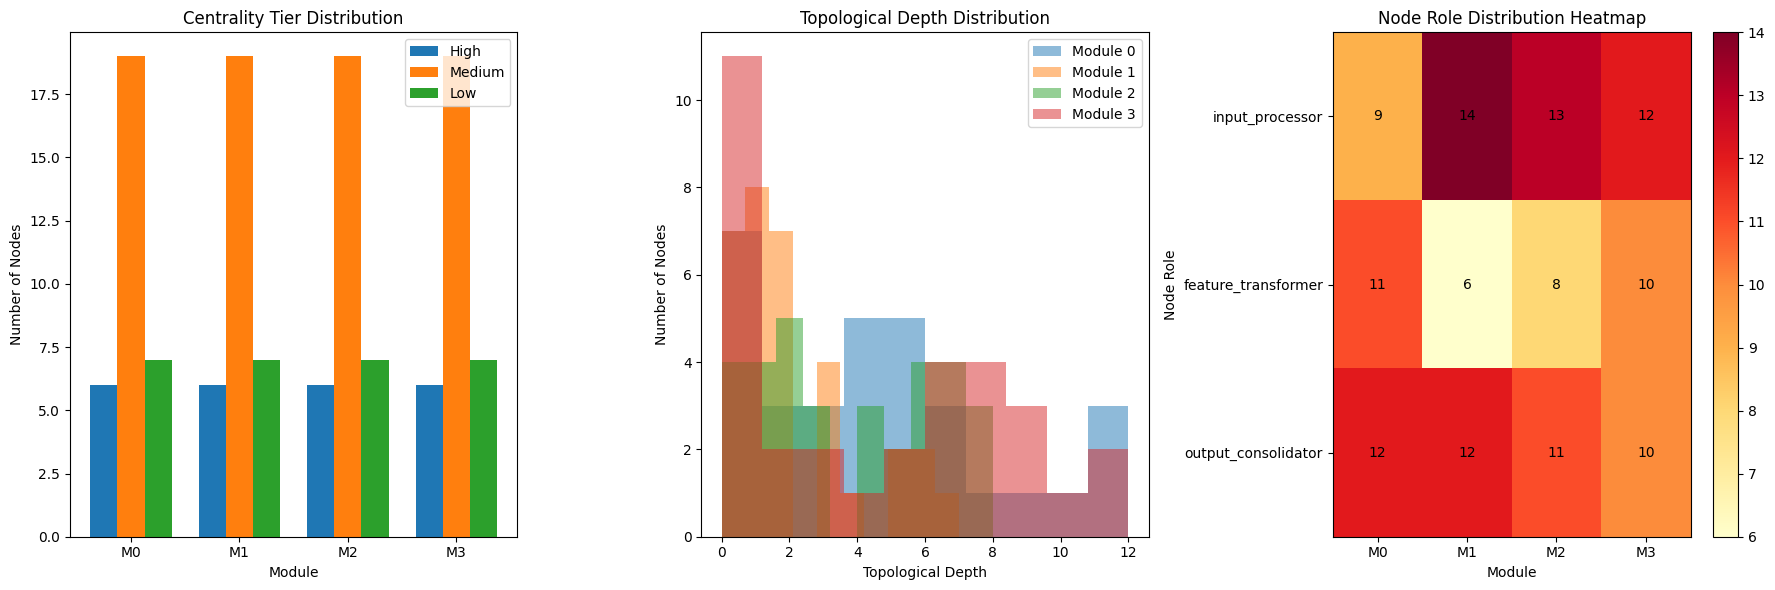


Loading CIFAR-10 dataset...


100%|██████████| 170M/170M [00:04<00:00, 37.0MB/s]



Starting training with smart connections...
Training on device: cuda
Model parameters: 26,124,714
Epoch: 1/15, Batch: 0, Loss: 2.2912
Epoch: 1/15, Batch: 100, Loss: 1.9941
Epoch: 1/15, Batch: 200, Loss: 1.7307
Epoch: 1/15, Batch: 300, Loss: 1.4917
Epoch: 1/15, Batch: 400, Loss: 1.1980
Epoch: 1/15, Batch: 500, Loss: 1.2928
Epoch: 1/15, Batch: 600, Loss: 1.1135
Epoch: 1/15, Batch: 700, Loss: 1.3809
Epoch 1/15:
  Train Loss: 1.4581, Train Acc: 46.69%
  Test Acc: 53.63%
--------------------------------------------------
Epoch: 2/15, Batch: 0, Loss: 1.1835
Epoch: 2/15, Batch: 100, Loss: 1.2390
Epoch: 2/15, Batch: 200, Loss: 0.8496
Epoch: 2/15, Batch: 300, Loss: 0.9690
Epoch: 2/15, Batch: 400, Loss: 1.1669
Epoch: 2/15, Batch: 500, Loss: 0.8380
Epoch: 2/15, Batch: 600, Loss: 1.0510
Epoch: 2/15, Batch: 700, Loss: 0.6757
Epoch 2/15:
  Train Loss: 0.9857, Train Acc: 65.04%
  Test Acc: 64.86%
--------------------------------------------------
Epoch: 3/15, Batch: 0, Loss: 0.9493
Epoch: 3/15, Batc

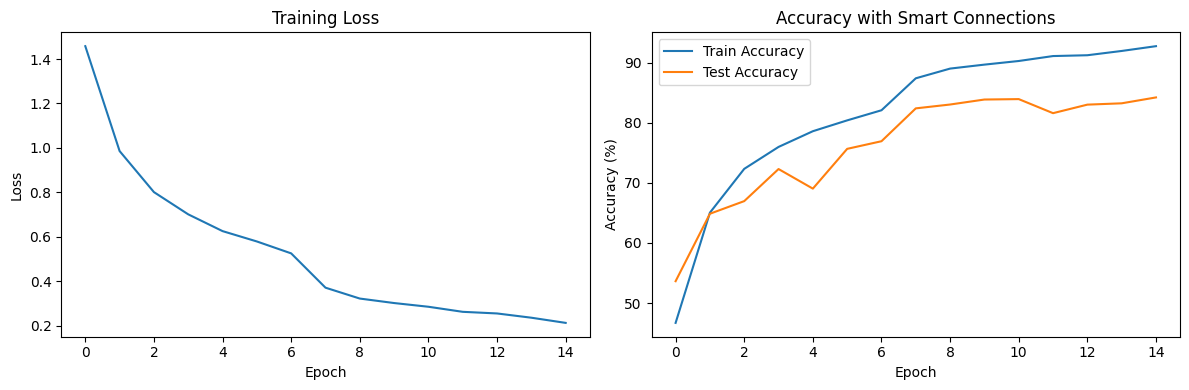


Training complete with smart connections!
Final test accuracy: 84.22%

Connection Strategy Summary:
- Information Bottleneck: High→Medium centrality connections
- Positional Similarity: Depth-matched connections
- Functional Similarity: Role-based connections


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
import math

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

class DAGConverter:
    """Convert undirected graph to Directed Acyclic Graph"""

    def __init__(self):
        pass

    def convert_to_dag(self, graph: nx.Graph) -> nx.DiGraph:
        """
        Convert undirected graph to DAG by assigning indices and directing edges
        from smaller to larger index (as described in paper)
        """
        # Create directed graph
        dag = nx.DiGraph()

        # Add all nodes
        dag.add_nodes_from(graph.nodes())

        # Add directed edges from smaller to larger index
        for u, v in graph.edges():
            if u < v:
                dag.add_edge(u, v)
            else:
                dag.add_edge(v, u)

        return dag

class HierarchicalConnector:
    """
    Enhanced Phase 1: Static Hierarchical Structure Implementation with Smart Connections
    Creates strategic inter-module connections to enhance small-world properties
    """

    def __init__(self, num_modules: int, nodes_per_module: int):
        self.num_modules = num_modules
        self.nodes_per_module = nodes_per_module

        # Cache for computed metrics
        self.centrality_tiers = None
        self.node_depths = None
        self.node_roles = None

    def create_hierarchical_connections(self, module_dags: List[nx.DiGraph]) -> Dict[str, List[Tuple[int, int]]]:
        """
        Create three types of inter-module connections:
        1. Hub-to-hub connections (primary backbone)
        2. Skip connections (functional bridges)
        3. Smart long-range connections (replacing random with strategic connections)

        Returns dictionary mapping connection types to lists of (module_idx, node_idx) pairs
        """
        connections = {
            'hub_to_hub': [],
            'skip_connections': [],
            'long_range_shortcuts': []
        }

        # Step 1: Identify hub nodes in each module
        hub_nodes = self._identify_hub_nodes(module_dags)

        # Step 2: Create hub-to-hub connections (primary backbone)
        connections['hub_to_hub'] = self._create_hub_connections(hub_nodes)

        # Step 3: Create skip connections between adjacent modules
        connections['skip_connections'] = self._create_skip_connections(module_dags)

        # Step 4: Create SMART long-range shortcuts (replacing random connections)
        connections['long_range_shortcuts'] = self._create_long_range_shortcuts(module_dags)

        return connections

    def _identify_hub_nodes(self, module_dags: List[nx.DiGraph]) -> List[List[int]]:
        """
        Identify hub nodes in each module based on degree centrality
        Hub nodes are those with highest connectivity within their module
        """
        hub_nodes = []

        for dag in module_dags:
            # Calculate degree centrality for each node
            degree_centrality = nx.degree_centrality(dag.to_undirected())

            # Sort nodes by centrality and take top 3 as hubs
            sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
            module_hubs = [node for node, centrality in sorted_nodes[:3]]
            hub_nodes.append(module_hubs)

        return hub_nodes

    def _create_hub_connections(self, hub_nodes: List[List[int]]) -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
        """
        Create primary backbone connections between hub nodes of different modules
        These are the main pathways for global information flow
        """
        hub_connections = []

        # Connect primary hubs in sequential order (creates processing pipeline)
        for i in range(len(hub_nodes) - 1):
            # Connect primary hub of module i to primary hub of module i+1
            source = (i, hub_nodes[i][0])  # (module_idx, node_idx)
            target = (i + 1, hub_nodes[i + 1][0])
            hub_connections.append((source, target))

        # Create additional hub connections for better connectivity
        # Connect secondary hubs across modules
        for i in range(len(hub_nodes) - 1):
            if len(hub_nodes[i]) > 1 and len(hub_nodes[i + 1]) > 1:
                source = (i, hub_nodes[i][1])  # Secondary hub
                target = (i + 1, hub_nodes[i + 1][1])
                hub_connections.append((source, target))

        # Create cross-module connections (module 0 to module 3, module 1 to module 3)
        if len(hub_nodes) == 4:  # For 4-module architecture
            # Connect module 0 to module 3 (long-range connection)
            source = (0, hub_nodes[0][0])
            target = (3, hub_nodes[3][0])
            hub_connections.append((source, target))

            # Connect module 1 to module 3 (skip connection)
            source = (1, hub_nodes[1][0])
            target = (3, hub_nodes[3][0])
            hub_connections.append((source, target))

        return hub_connections

    def _create_skip_connections(self, module_dags: List[nx.DiGraph]) -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
        """
        Create functional skip connections between adjacent modules
        These connect functionally similar nodes across modules
        """
        skip_connections = []

        for i in range(len(module_dags) - 1):
            current_dag = module_dags[i]
            next_dag = module_dags[i + 1]

            # Get nodes with similar structural properties
            current_nodes = list(current_dag.nodes())
            next_nodes = list(next_dag.nodes())

            # Create connections based on node position similarity
            # Connect nodes at similar positions in the processing pipeline
            num_connections = min(4, len(current_nodes), len(next_nodes))

            for j in range(num_connections):
                # Use modulo to wrap around if fewer nodes available
                source_node = current_nodes[j % len(current_nodes)]
                target_node = next_nodes[j % len(next_nodes)]

                source = (i, source_node)
                target = (i + 1, target_node)
                skip_connections.append((source, target))

        return skip_connections

    def _calculate_centrality_tiers(self, module_dags: List[nx.DiGraph]) -> List[Dict[str, List[int]]]:
        """
        Calculate centrality tiers for all modules
        Returns list of dictionaries with 'high', 'medium', 'low' tier nodes for each module
        """
        all_tiers = []

        for dag in module_dags:
            # Calculate degree centrality
            degree_centrality = nx.degree_centrality(dag.to_undirected())

            # Sort nodes by centrality
            sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

            # Calculate tier boundaries
            num_nodes = len(sorted_nodes)
            high_boundary = int(num_nodes * 0.2)
            low_boundary = int(num_nodes * 0.8)

            # Classify nodes into tiers
            tiers = {
                'high': [node for node, _ in sorted_nodes[:high_boundary]],
                'medium': [node for node, _ in sorted_nodes[high_boundary:low_boundary]],
                'low': [node for node, _ in sorted_nodes[low_boundary:]]
            }

            # Ensure each tier has at least one node
            if not tiers['high']:
                tiers['high'] = [sorted_nodes[0][0]]
            if not tiers['medium']:
                tiers['medium'] = [sorted_nodes[len(sorted_nodes)//2][0]]
            if not tiers['low']:
                tiers['low'] = [sorted_nodes[-1][0]]

            all_tiers.append(tiers)

        return all_tiers

    def _calculate_topological_depths(self, module_dags: List[nx.DiGraph]) -> List[Dict[int, int]]:
        """
        Calculate topological depth for each node in each module
        Returns list of dictionaries mapping node to depth for each module
        """
        all_depths = []

        for dag in module_dags:
            depths = {}

            # Get topological ordering
            try:
                topo_order = list(nx.topological_sort(dag))

                # Calculate depth for each node
                for node in dag.nodes():
                    # Find all paths from input nodes to this node
                    input_nodes = [n for n in dag.nodes() if dag.in_degree(n) == 0]

                    if node in input_nodes:
                        depths[node] = 0
                    else:
                        # Calculate maximum path length from any input node
                        max_depth = 0
                        for input_node in input_nodes:
                            try:
                                paths = list(nx.all_simple_paths(dag, input_node, node))
                                if paths:
                                    max_path_length = max(len(path) - 1 for path in paths)
                                    max_depth = max(max_depth, max_path_length)
                            except nx.NetworkXNoPath:
                                continue
                        depths[node] = max_depth

            except nx.NetworkXError:
                # If topological sort fails, use simpler approach
                for node in dag.nodes():
                    depths[node] = dag.in_degree(node)

            all_depths.append(depths)

        return all_depths

    def _classify_node_roles(self, module_dags: List[nx.DiGraph]) -> List[Dict[int, str]]:
        """
        Classify nodes based on their role in the DAG
        Returns list of dictionaries mapping node to role for each module
        """
        all_roles = []

        for dag in module_dags:
            roles = {}

            for node in dag.nodes():
                in_degree = dag.in_degree(node)
                out_degree = dag.out_degree(node)

                # Classify based on connectivity patterns
                if in_degree <= 1:
                    roles[node] = 'input_processor'
                elif out_degree <= 1:
                    roles[node] = 'output_consolidator'
                elif in_degree >= 2 and in_degree <= 4 and out_degree > 1:
                    roles[node] = 'feature_transformer'
                else:
                    # Default to feature transformer for nodes that don't fit other categories
                    roles[node] = 'feature_transformer'

            all_roles.append(roles)

        return all_roles

    def _create_bottleneck_connections(self, centrality_tiers: List[Dict[str, List[int]]]) -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
        """
        Create information bottleneck connections
        Connect high-tier nodes from earlier modules to medium-tier nodes in later modules
        """
        connections = []

        for i in range(len(centrality_tiers)):
            for j in range(i + 2, len(centrality_tiers)):  # Non-adjacent modules only
                # Select high-tier node from module i
                if centrality_tiers[i]['high']:
                    source_node = centrality_tiers[i]['high'][0]  # Take first high-tier node

                    # Select medium-tier node from module j
                    if centrality_tiers[j]['medium']:
                        target_node = centrality_tiers[j]['medium'][0]  # Take first medium-tier node

                        connections.append(((i, source_node), (j, target_node)))

        return connections

    def _create_positional_connections(self, node_depths: List[Dict[int, int]]) -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
        """
        Create positional similarity connections
        Connect nodes with similar topological depths across modules
        """
        connections = []

        for i in range(len(node_depths)):
            for j in range(i + 2, len(node_depths)):  # Non-adjacent modules only
                # Find best depth matches
                best_matches = []

                for source_node, source_depth in node_depths[i].items():
                    for target_node, target_depth in node_depths[j].items():
                        depth_diff = abs(source_depth - target_depth)
                        if depth_diff <= 1:  # Tolerance of ±1
                            best_matches.append((depth_diff, source_node, target_node))

                # Sort by depth difference and take best matches
                best_matches.sort(key=lambda x: x[0])

                # Create 1-2 connections per module pair
                for k in range(min(2, len(best_matches))):
                    _, source_node, target_node = best_matches[k]
                    connections.append(((i, source_node), (j, target_node)))

        return connections

    def _create_functional_connections(self, node_roles: List[Dict[int, str]]) -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
        """
        Create functional similarity connections
        Connect nodes with similar computational roles across modules
        """
        connections = []

        for i in range(len(node_roles)):
            for j in range(i + 2, len(node_roles)):  # Non-adjacent modules only
                # Group nodes by role in each module
                source_by_role = {}
                target_by_role = {}

                for node, role in node_roles[i].items():
                    if role not in source_by_role:
                        source_by_role[role] = []
                    source_by_role[role].append(node)

                for node, role in node_roles[j].items():
                    if role not in target_by_role:
                        target_by_role[role] = []
                    target_by_role[role].append(node)

                # Connect nodes with same roles (1 connection per role type)
                for role in ['input_processor', 'feature_transformer', 'output_consolidator']:
                    if role in source_by_role and role in target_by_role:
                        source_node = source_by_role[role][0]  # Take first node of this role
                        target_node = target_by_role[role][0]  # Take first node of this role
                        connections.append(((i, source_node), (j, target_node)))

        return connections

    def _create_long_range_shortcuts(self, module_dags: List[nx.DiGraph]) -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
        """
        Create three types of smart long-range connections instead of random ones
        """
        all_connections = []

        # Calculate required metrics once
        centrality_tiers = self._calculate_centrality_tiers(module_dags)
        node_depths = self._calculate_topological_depths(module_dags)
        node_roles = self._classify_node_roles(module_dags)

        # Store for potential reuse
        self.centrality_tiers = centrality_tiers
        self.node_depths = node_depths
        self.node_roles = node_roles

        # Create connections for each type
        bottleneck_connections = self._create_bottleneck_connections(centrality_tiers)
        positional_connections = self._create_positional_connections(node_depths)
        functional_connections = self._create_functional_connections(node_roles)

        # Combine all connection types
        all_connections.extend(bottleneck_connections)
        all_connections.extend(positional_connections)
        all_connections.extend(functional_connections)

        return all_connections

class NodeOperation(nn.Module):
    """
    Enhanced Neural network node operation with hierarchical connection support
    Performs: Aggregation -> Transformation -> Distribution
    """

    def __init__(self, in_channels: int, out_channels: int, max_inputs: int = 12, use_gelu: bool = False):
        super(NodeOperation, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.max_inputs = max_inputs

        # Aggregation weights (learnable and positive via sigmoid)
        # Increased max_inputs to handle hierarchical connections
        self.aggregation_weights = nn.Parameter(torch.randn(max_inputs))

        # Transformation operations
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batch_norm = nn.BatchNorm2d(out_channels)

        # Activation function (GeLU for first modules, ReLU for others as per paper)
        if use_gelu:
            self.activation = nn.GELU()
        else:
            self.activation = nn.ReLU(inplace=True)

    def forward(self, inputs: List[torch.Tensor]) -> torch.Tensor:
        """
        Forward pass implementing the three steps from paper:
        1. Aggregation: weighted sum of inputs (now including hierarchical inputs)
        2. Transformation: conv + batch_norm + activation
        3. Distribution: output to next nodes
        """
        if not inputs:
            raise ValueError("Node must have at least one input")

        # Step 1: Aggregation with learnable weights
        if len(inputs) == 1:
            aggregated = inputs[0]
        else:
            # Limit the number of inputs to max_inputs to prevent index errors
            num_inputs = min(len(inputs), self.max_inputs)
            limited_inputs = inputs[:num_inputs]

            # Apply sigmoid to ensure positive weights
            weights = torch.sigmoid(self.aggregation_weights[:num_inputs])
            weights = weights / weights.sum()  # Normalize weights

            # Weighted sum of inputs
            aggregated = torch.zeros_like(limited_inputs[0])
            for i, inp in enumerate(limited_inputs):
                aggregated += weights[i] * inp

        # Step 2: Transformation
        x = self.conv(aggregated)
        x = self.batch_norm(x)
        x = self.activation(x)

        return x

class CNNBCNModule(nn.Module):
    """
    Enhanced CNNBCN module with hierarchical connection support
    """

    def __init__(self, dag: nx.DiGraph, in_channels: int, out_channels: int, use_gelu: bool = False, module_idx: int = 0):
        super(CNNBCNModule, self).__init__()
        self.dag = dag
        self.nodes = list(dag.nodes())
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.module_idx = module_idx

        # Calculate max inputs for any node (increased for hierarchical connections)
        max_inputs = max([dag.in_degree(node) for node in self.nodes] + [1])
        max_inputs = max(max_inputs, 12)  # Increased to handle hierarchical inputs

        # Create node operations
        self.node_ops = nn.ModuleDict()
        for node in self.nodes:
            self.node_ops[str(node)] = NodeOperation(in_channels, out_channels, max_inputs, use_gelu)

        # Input and output node mappings
        self.input_nodes = [node for node in self.nodes if dag.in_degree(node) == 0]
        self.output_nodes = [node for node in self.nodes if dag.out_degree(node) == 0]

        # If no natural input/output nodes, use first and last
        if not self.input_nodes:
            self.input_nodes = [min(self.nodes)]
        if not self.output_nodes:
            self.output_nodes = [max(self.nodes)]

        # Input projection to distribute input to input nodes
        self.input_projection = nn.Conv2d(in_channels, out_channels, kernel_size=1)

        # Output aggregation
        if len(self.output_nodes) > 1:
            self.output_aggregation = nn.Conv2d(out_channels * len(self.output_nodes), out_channels, kernel_size=1)
        else:
            self.output_aggregation = None

    def forward(self, x: torch.Tensor, hierarchical_inputs: Dict[int, torch.Tensor] = None) -> Tuple[torch.Tensor, Dict[int, torch.Tensor]]:
        """
        Forward pass with hierarchical connection support

        Args:
            x: Primary input tensor
            hierarchical_inputs: Dictionary mapping node indices to hierarchical input tensors

        Returns:
            Tuple of (output_tensor, node_outputs_dict)
        """
        # Project input
        x_proj = self.input_projection(x)

        # Initialize node outputs
        node_outputs = {}

        # Topological sort for processing order
        topo_order = list(nx.topological_sort(self.dag))

        # Process nodes in topological order
        for node in topo_order:
            node_inputs = []

            if node in self.input_nodes:
                # Input nodes receive the projected input
                node_inputs.append(x_proj)
            else:
                # Collect inputs from predecessor nodes
                predecessors = list(self.dag.predecessors(node))
                for pred in predecessors:
                    if pred in node_outputs:
                        node_inputs.append(node_outputs[pred])

            # Add hierarchical inputs if available
            if hierarchical_inputs and node in hierarchical_inputs:
                node_inputs.append(hierarchical_inputs[node])

            if node_inputs:
                node_outputs[node] = self.node_ops[str(node)](node_inputs)

        # Aggregate outputs from output nodes
        output_tensors = [node_outputs[node] for node in self.output_nodes if node in node_outputs]

        if not output_tensors:
            # Fallback: use last computed node output
            output_tensors = [list(node_outputs.values())[-1]]

        if len(output_tensors) == 1:
            final_output = output_tensors[0]
        else:
            # Concatenate and aggregate multiple outputs
            concatenated = torch.cat(output_tensors, dim=1)
            final_output = self.output_aggregation(concatenated)

        return final_output, node_outputs

class CNNBCN(nn.Module):
    """
    Enhanced CNNBCN model with Smart Inter-Module Connections
    """

    def __init__(self, num_classes: int = 10, num_modules: int = 4, nodes_per_module: int = 32):
        super(CNNBCN, self).__init__()

        self.num_modules = num_modules
        self.nodes_per_module = nodes_per_module

        # Generate random graphs and convert to DAGs for each module
        self.dags = []
        for i in range(num_modules):
            # Use NetworkX's watts_strogatz_graph
            # Parameters: n=nodes, k=nearest neighbors, p=rewiring probability
            # WS parameters as specified in paper: WS(Z=4, P=0.75)
            ws_graph = nx.watts_strogatz_graph(n=nodes_per_module, k=4, p=0.75, seed=42+i)

            # Convert to DAG
            dag_converter = DAGConverter()
            dag = dag_converter.convert_to_dag(ws_graph)
            self.dags.append(dag)

        # Create hierarchical connections with SMART connections
        self.hierarchical_connector = HierarchicalConnector(num_modules, nodes_per_module)
        self.hierarchical_connections = self.hierarchical_connector.create_hierarchical_connections(self.dags)

        # Channel progression (simple mode from paper: 78 channels)
        # For CIFAR-10, we'll use a smaller progression
        channels = [32, 64, 128, 256]  # Reduced from paper's 78 channels for efficiency

        # Input layer
        self.input_conv = nn.Conv2d(3, channels[0], kernel_size=3, padding=1)
        self.input_bn = nn.BatchNorm2d(channels[0])
        self.input_relu = nn.ReLU(inplace=True)

        # Enhanced CNNBCN modules with hierarchical support
        self.modules_list = nn.ModuleList()
        for i in range(num_modules):
            in_ch = channels[i] if i < len(channels) else channels[-1]
            out_ch = channels[i] if i < len(channels) else channels[-1]

            # Use GeLU for first two modules, ReLU for others (as per paper)
            use_gelu = i < 2

            module = CNNBCNModule(self.dags[i], in_ch, out_ch, use_gelu, module_idx=i)
            self.modules_list.append(module)

        # Hierarchical connection projections
        # These layers adapt features from different modules for hierarchical connections
        self.hierarchical_projections = nn.ModuleDict()
        for i in range(num_modules):
            for j in range(num_modules):
                if i != j:  # Don't create self-connections
                    # Create projection layer to match channel dimensions
                    source_channels = channels[i] if i < len(channels) else channels[-1]
                    target_channels = channels[j] if j < len(channels) else channels[-1]

                    proj_key = f"{i}_to_{j}"
                    self.hierarchical_projections[proj_key] = nn.Sequential(
                        nn.Conv2d(source_channels, target_channels, kernel_size=1),
                        nn.BatchNorm2d(target_channels),
                        nn.ReLU(inplace=True)
                    )

        # Downsampling layers between modules
        self.downsample_layers = nn.ModuleList()
        for i in range(num_modules - 1):
            if i < len(channels) - 1:
                downsample = nn.Sequential(
                    nn.Conv2d(channels[i], channels[i+1], kernel_size=3, stride=2, padding=1),
                    nn.BatchNorm2d(channels[i+1]),
                    nn.ReLU(inplace=True)
                )
            else:
                # If we have more modules than channel sizes, use identity or simple conv
                downsample = nn.Sequential(
                    nn.Conv2d(channels[-1], channels[-1], kernel_size=3, stride=2, padding=1),
                    nn.BatchNorm2d(channels[-1]),
                    nn.ReLU(inplace=True)
                )
            self.downsample_layers.append(downsample)

        # Global average pooling and classifier
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(channels[-1], num_classes)
        )

    def _prepare_hierarchical_inputs(self, all_module_outputs: Dict[int, Dict[int, torch.Tensor]],
                                   current_module_idx: int, target_spatial_size: Tuple[int, int]) -> Dict[int, torch.Tensor]:
        """
        Prepare hierarchical inputs for the current module based on connections
        Resizes hierarchical inputs to match the target spatial size.
        """
        hierarchical_inputs = {}

        # Process all connection types
        for connection_type, connections in self.hierarchical_connections.items():
            for (source_module, source_node), (target_module, target_node) in connections:
                # Only process connections targeting the current module
                if target_module == current_module_idx:
                    # Check if source module has been processed
                    if source_module in all_module_outputs:
                        if source_node in all_module_outputs[source_module]:
                            source_output = all_module_outputs[source_module][source_node]

                            # Project to match target module's channel dimensions
                            proj_key = f"{source_module}_to_{target_module}"
                            if proj_key in self.hierarchical_projections:
                                projected_output = self.hierarchical_projections[proj_key](source_output)

                                # Resize the projected output to match the target spatial size
                                resized_output = F.adaptive_avg_pool2d(projected_output, target_spatial_size)

                                # Add to hierarchical inputs (accumulate if multiple connections to same node)
                                if target_node in hierarchical_inputs:
                                    hierarchical_inputs[target_node] = (hierarchical_inputs[target_node] + resized_output) / 2
                                else:
                                    hierarchical_inputs[target_node] = resized_output

        return hierarchical_inputs

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Enhanced forward pass with hierarchical connections
        """
        # Input processing
        x = self.input_conv(x)
        x = self.input_bn(x)
        x = self.input_relu(x)

        # Store all module outputs for hierarchical connections
        all_module_outputs = {}
        current_x = x

        # Pass through CNNBCN modules with hierarchical connections
        for i, module in enumerate(self.modules_list):
            # Determine the target spatial size for hierarchical inputs
            if i == 0:
                target_spatial_size = (x.size(2), x.size(3))
            else:
                # For subsequent modules, calculate expected size after downsampling
                prev_module_output = all_module_outputs[i-1][list(self.dags[i-1].nodes())[0]]
                target_spatial_size = (prev_module_output.size(2) // 2, prev_module_output.size(3) // 2)

            # Prepare hierarchical inputs for current module
            hierarchical_inputs = self._prepare_hierarchical_inputs(all_module_outputs, i, target_spatial_size)

            # Forward pass through module with hierarchical inputs
            current_x, node_outputs = module(current_x, hierarchical_inputs)

            # Store outputs for future hierarchical connections
            all_module_outputs[i] = node_outputs

            # Downsample between modules (except last)
            if i < len(self.downsample_layers):
                current_x = self.downsample_layers[i](current_x)

        # Global average pooling and classification
        x = self.global_avg_pool(current_x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)

        return x

    def print_hierarchical_structure(self):
        """
        Enhanced print function to show smart connection details
        """
        print("\n" + "="*60)
        print("SMART HIERARCHICAL CONNECTION STRUCTURE")
        print("="*60)

        # Print analysis of smart connections if available
        if hasattr(self.hierarchical_connector, 'centrality_tiers') and self.hierarchical_connector.centrality_tiers:
            print("\n[Connection Strategy Analysis]")
            print("-" * 40)

            # Show centrality tier distribution
            print("\nCentrality Tiers per Module:")
            for i, tiers in enumerate(self.hierarchical_connector.centrality_tiers):
                print(f"  Module {i}: High={len(tiers['high'])}, Medium={len(tiers['medium'])}, Low={len(tiers['low'])} nodes")

            # Show depth distribution
            if self.hierarchical_connector.node_depths:
                print("\nTopological Depth Range per Module:")
                for i, depths in enumerate(self.hierarchical_connector.node_depths):
                    if depths:
                        min_depth = min(depths.values())
                        max_depth = max(depths.values())
                        print(f"  Module {i}: Depth range [{min_depth}, {max_depth}]")

            # Show role distribution
            if self.hierarchical_connector.node_roles:
                print("\nNode Role Distribution per Module:")
                for i, roles in enumerate(self.hierarchical_connector.node_roles):
                    role_counts = {}
                    for role in roles.values():
                        role_counts[role] = role_counts.get(role, 0) + 1
                    print(f"  Module {i}: {role_counts}")

        # Print actual connections
        for connection_type, connections in self.hierarchical_connections.items():
            print(f"\n{connection_type.upper().replace('_', ' ')}:")
            print("-" * 40)

            # Group connections by type for better readability
            if connection_type == 'long_range_shortcuts':
                print("  [Smart connections replacing random shortcuts]")

            for (source_module, source_node), (target_module, target_node) in connections[:10]:  # Show first 10
                print(f"  Module {source_module}, Node {source_node} -> Module {target_module}, Node {target_node}")

            if len(connections) > 10:
                print(f"  ... and {len(connections) - 10} more connections")

        print(f"\nTotal hierarchical connections: {sum(len(connections) for connections in self.hierarchical_connections.values())}")
        print("="*60)

def get_cifar10_dataloaders(batch_size: int = 64, num_workers: int = 2):
    """Get CIFAR-10 data loaders"""

    # Data transforms
    train_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

    # Load datasets
    train_dataset = torchvision.datasets.CIFAR10(
        root='./data', train=True, download=True, transform=train_transform
    )

    test_dataset = torchvision.datasets.CIFAR10(
        root='./data', train=False, download=True, transform=test_transform
    )

    # Create data loaders
    train_loader = DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers
    )

    test_loader = DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers
    )

    return train_loader, test_loader

def train_model(model, train_loader, test_loader, num_epochs=15, lr=0.001):
    """Train the enhanced CNNBCN model"""

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    # Training history
    train_losses = []
    train_accuracies = []
    test_accuracies = []

    print(f"Training on device: {device}")
    print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = output.max(1)
            total_train += target.size(0)
            correct_train += predicted.eq(target).sum().item()

            if batch_idx % 100 == 0:
                print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}, '
                      f'Loss: {loss.item():.4f}')

        # Calculate training metrics
        epoch_loss = running_loss / len(train_loader)
        train_acc = 100. * correct_train / total_train

        # Test phase
        model.eval()
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                _, predicted = output.max(1)
                total_test += target.size(0)
                correct_test += predicted.eq(target).sum().item()

        test_acc = 100. * correct_test / total_test

        # Update learning rate
        scheduler.step()

        # Save metrics
        train_losses.append(epoch_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'  Train Loss: {epoch_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'  Test Acc: {test_acc:.2f}%')
        print('-' * 50)

    return train_losses, train_accuracies, test_accuracies

def visualize_smart_connections(model):
    """
    Visualize the smart connection strategy
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    connector = model.hierarchical_connector

    # Visualize centrality tiers
    if hasattr(connector, 'centrality_tiers') and connector.centrality_tiers:
        ax = axes[0]
        module_labels = [f"M{i}" for i in range(len(connector.centrality_tiers))]
        tier_data = {'High': [], 'Medium': [], 'Low': []}

        for tiers in connector.centrality_tiers:
            tier_data['High'].append(len(tiers['high']))
            tier_data['Medium'].append(len(tiers['medium']))
            tier_data['Low'].append(len(tiers['low']))

        x = np.arange(len(module_labels))
        width = 0.25

        for i, (tier, counts) in enumerate(tier_data.items()):
            ax.bar(x + i*width, counts, width, label=tier)

        ax.set_xlabel('Module')
        ax.set_ylabel('Number of Nodes')
        ax.set_title('Centrality Tier Distribution')
        ax.set_xticks(x + width)
        ax.set_xticklabels(module_labels)
        ax.legend()

    # Visualize depth distribution
    if hasattr(connector, 'node_depths') and connector.node_depths:
        ax = axes[1]
        for i, depths in enumerate(connector.node_depths):
            if depths:
                depth_values = list(depths.values())
                ax.hist(depth_values, alpha=0.5, label=f'Module {i}', bins=10)

        ax.set_xlabel('Topological Depth')
        ax.set_ylabel('Number of Nodes')
        ax.set_title('Topological Depth Distribution')
        ax.legend()

    # Visualize role distribution
    if hasattr(connector, 'node_roles') and connector.node_roles:
        ax = axes[2]
        role_types = ['input_processor', 'feature_transformer', 'output_consolidator']
        module_labels = [f"M{i}" for i in range(len(connector.node_roles))]

        role_matrix = []
        for roles in connector.node_roles:
            role_counts = [0, 0, 0]
            for role in roles.values():
                if role in role_types:
                    role_counts[role_types.index(role)] += 1
            role_matrix.append(role_counts)

        role_matrix = np.array(role_matrix).T

        im = ax.imshow(role_matrix, cmap='YlOrRd', aspect='auto')
        ax.set_xticks(np.arange(len(module_labels)))
        ax.set_yticks(np.arange(len(role_types)))
        ax.set_xticklabels(module_labels)
        ax.set_yticklabels(role_types)
        ax.set_xlabel('Module')
        ax.set_ylabel('Node Role')
        ax.set_title('Node Role Distribution Heatmap')

        # Add text annotations
        for i in range(len(role_types)):
            for j in range(len(module_labels)):
                text = ax.text(j, i, int(role_matrix[i, j]),
                             ha="center", va="center", color="black")

        plt.colorbar(im, ax=ax)

    plt.tight_layout()
    plt.savefig('smart_connections_analysis.png')
    plt.show()

def main():
    """Main execution function"""
    print("="*60)
    print("ENHANCED CNNBCN WITH SMART INTER-MODULE CONNECTIONS")
    print("="*60)

    # Create model with exact same parameters as original
    num_classes = 10
    num_modules = 4
    nodes_per_module = 32

    model = CNNBCN(
        num_classes=num_classes,
        num_modules=num_modules,
        nodes_per_module=nodes_per_module
    )

    # Print model structure
    print("\nModel Architecture Summary:")
    print("-" * 40)
    print(f"Number of modules: {num_modules}")
    print(f"Nodes per module: {nodes_per_module}")
    print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")

    # Print enhanced hierarchical structure
    model.print_hierarchical_structure()

    # Visualize smart connections
    print("\nVisualizing smart connection strategies...")
    visualize_smart_connections(model)

    # Get CIFAR-10 data loaders (same batch size as original)
    print("\nLoading CIFAR-10 dataset...")
    train_loader, test_loader = get_cifar10_dataloaders(batch_size=64)

    # Train the model (same hyperparameters as original)
    print("\nStarting training with smart connections...")
    train_losses, train_accs, test_accs = train_model(
        model,
        train_loader,
        test_loader,
        num_epochs=15,
        lr=0.001
    )

    # Plot results
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(test_accs, label='Test Accuracy')
    plt.title('Accuracy with Smart Connections')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.savefig('cnnbcn_smart_results.png')
    plt.show()

    # Final evaluation
    final_test_acc = test_accs[-1]
    print(f"\nTraining complete with smart connections!")
    print(f"Final test accuracy: {final_test_acc:.2f}%")
    print("\nConnection Strategy Summary:")
    print("- Information Bottleneck: High→Medium centrality connections")
    print("- Positional Similarity: Depth-matched connections")
    print("- Functional Similarity: Role-based connections")

if __name__ == "__main__":
    main()